In [1]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
x_train = mnist.train.images[:55000,:]
x_train.shape
#这里注意下是784个pixel training的时候shape要一致

(55000, 784)

### Genetor

In [4]:
def generator(z):
    with tf.variable_scope("generator",reuse = tf.AUTO_REUSE):
        init = tf.contrib.layers.xavier_initializer()
        cov_1 = tf.layers.dense(inputs = z, units = 384 , activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        cov_2 = tf.layers.dense(inputs = cov_1, units = 128, activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        cov_3 = tf.layers.dense(inputs = cov_2, units = 64, activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        output_1 = tf.layers.dense(inputs = cov_1, units = 784, activation = tf.nn.tanh, kernel_initializer = init, use_bias = True)
        
        return output_1

### Discriminator

In [5]:
def discriminator(x):
    with tf.variable_scope("discriminator",reuse = tf.AUTO_REUSE):
        init = tf.contrib.layers.xavier_initializer()
        cov_1 = tf.layers.dense(inputs = x, units = 384 , activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        cov_2 = tf.layers.dense(inputs = cov_1, units = 256, activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        cov_3 = tf.layers.dense(inputs = cov_2, units = 128, activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        logit = tf.layers.dense(inputs = cov_3, units = 1, kernel_initializer = init, use_bias = True)
        
        return logit

### Loss Function

In [6]:
x = tf.placeholder(tf.float32,shape = [None, 784])
z = tf.placeholder(tf.float32,shape = [None,100])

In [7]:
G_sample = generator(z) #取得生成器的生成结果
D_logit_real = discriminator(x) #取得判别器判别的真实手写数字的结果
D_logit_fake = discriminator(G_sample) #取得判别器判别的生成的手写数字的结果
 
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones_like(D_logit_real))) #对判别器对真实样本的判别结果计算误差(将结果与1比较)
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake))) #对判别器对虚假样本(即生成器生成的手写数字)的判别结果计算误差(将结果与0比较)
d_loss = D_loss_real + D_loss_fake #判别器的误差
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones_like(D_logit_fake)))

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


### Optimizer

In [8]:
D_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'discriminator')
G_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'generator')
D_solver = tf.train.AdamOptimizer(learning_rate = 1e-3,beta1 = 0.5).minimize(d_loss,var_list = D_vars)
G_solver = tf.train.AdamOptimizer(learning_rate = 1e-3,beta1 = 0.5).minimize(g_loss,var_list = G_vars)

### Training

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

  0%|          | 0/50000 [00:00<?, ?it/s]

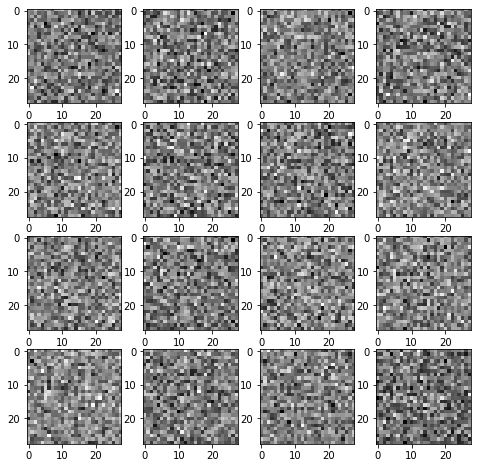


ITER:0
D_cur_loss:1.412423014640808
G_cur_loss:0.8192214369773865



  2%|▏         | 996/50000 [00:29<20:34, 39.70it/s]  

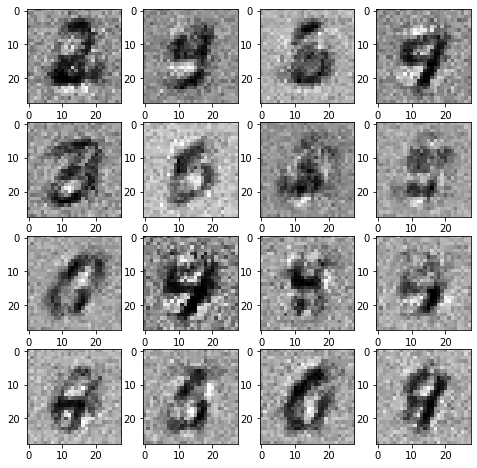


ITER:1000
D_cur_loss:0.5119012594223022
G_cur_loss:3.318869113922119



  4%|▍         | 1999/50000 [00:58<28:26, 28.13it/s]  

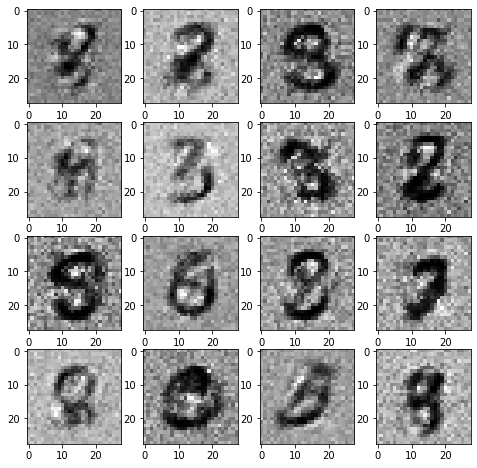


ITER:2000
D_cur_loss:0.32535991072654724
G_cur_loss:4.587591171264648



  6%|▌         | 2998/50000 [01:34<27:25, 28.56it/s]  

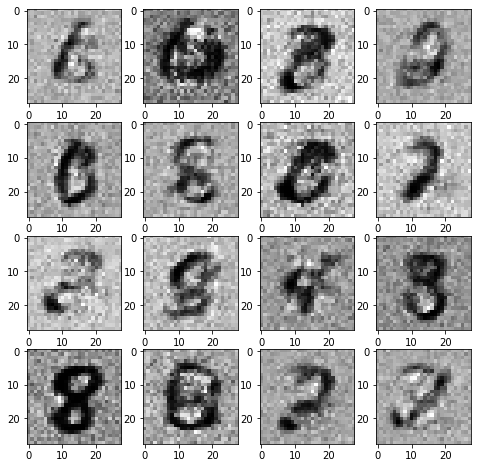


ITER:3000
D_cur_loss:0.34238341450691223
G_cur_loss:5.688995838165283



  8%|▊         | 3999/50000 [02:05<27:47, 27.59it/s]  

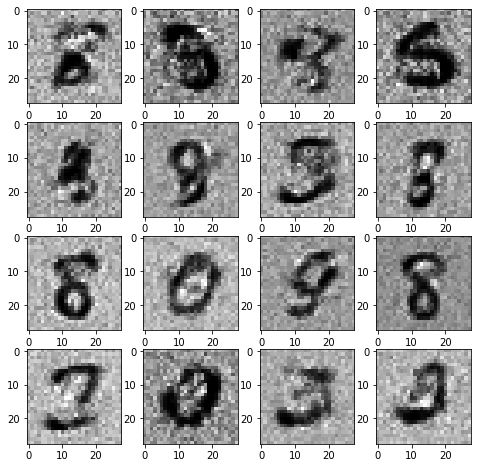


ITER:4000
D_cur_loss:0.16910219192504883
G_cur_loss:6.681434154510498



 10%|▉         | 4997/50000 [02:36<20:22, 36.82it/s]  

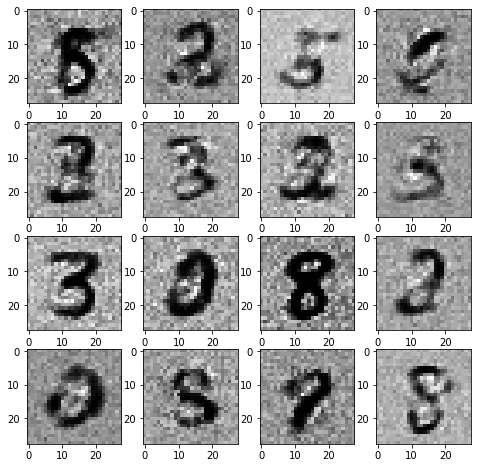


ITER:5000
D_cur_loss:0.27266770601272583
G_cur_loss:5.669802665710449



 12%|█▏        | 5999/50000 [03:09<31:44, 23.11it/s]  

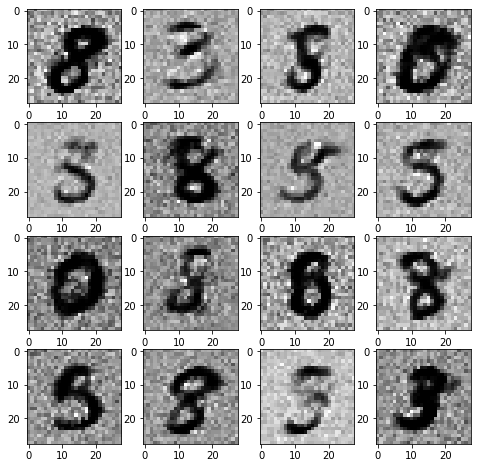


ITER:6000
D_cur_loss:0.3357585668563843
G_cur_loss:4.219817161560059



 14%|█▍        | 6998/50000 [03:45<22:44, 31.52it/s]  

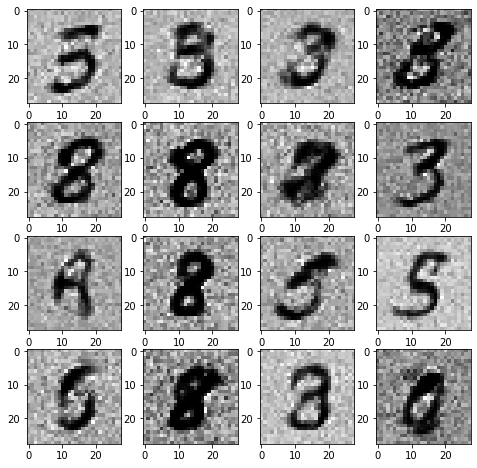


ITER:7000
D_cur_loss:0.17389816045761108
G_cur_loss:5.25781774520874



 16%|█▌        | 7997/50000 [04:19<18:27, 37.92it/s]  

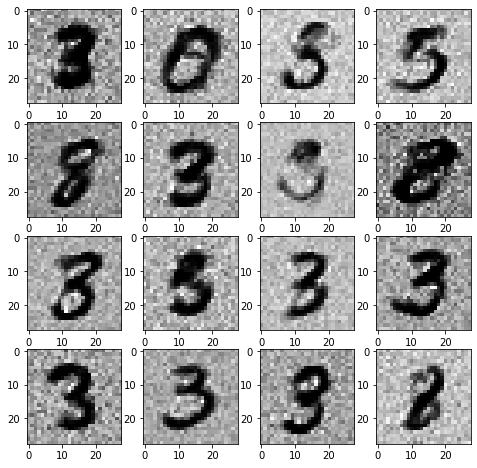


ITER:8000
D_cur_loss:0.15963254868984222
G_cur_loss:3.9291634559631348



 18%|█▊        | 9000/50000 [04:51<17:23, 39.29it/s]  

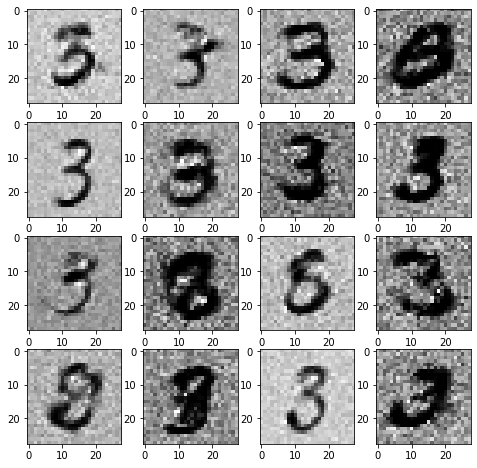


ITER:9000
D_cur_loss:0.21774029731750488
G_cur_loss:4.412325382232666



 20%|█▉        | 9997/50000 [05:20<17:09, 38.84it/s]  

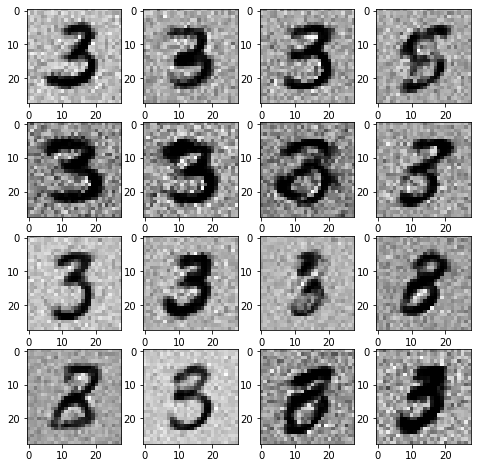


ITER:10000
D_cur_loss:0.1253800094127655
G_cur_loss:5.363377571105957



 22%|██▏       | 11000/50000 [05:52<24:36, 26.42it/s]  

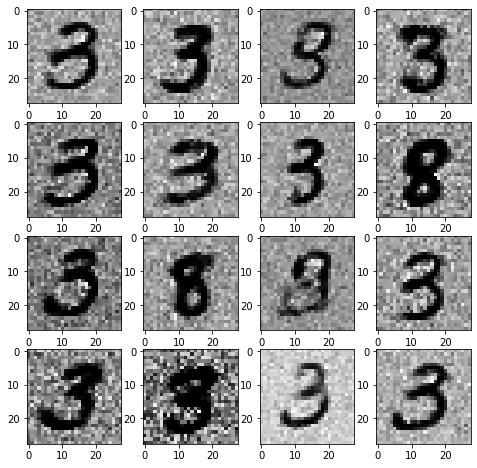


ITER:11000
D_cur_loss:0.09768560528755188
G_cur_loss:5.29897403717041



 24%|██▍       | 11999/50000 [06:24<17:19, 36.57it/s]  

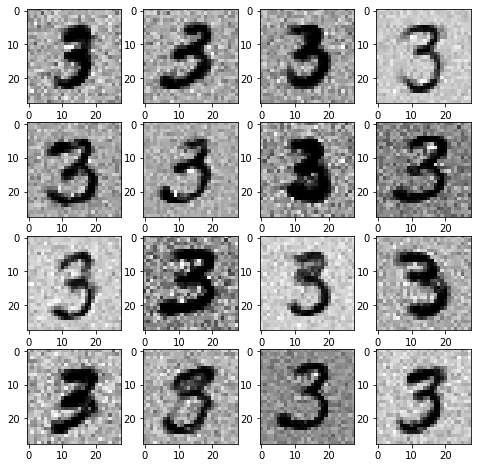


ITER:12000
D_cur_loss:0.07950609177350998
G_cur_loss:4.233961582183838



 26%|██▌       | 12998/50000 [06:55<17:56, 34.38it/s]  

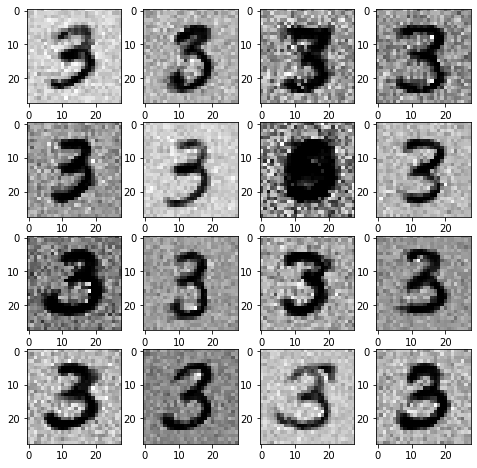


ITER:13000
D_cur_loss:0.10320243239402771
G_cur_loss:5.069604873657227



 28%|██▊       | 14000/50000 [07:30<20:40, 29.02it/s]  

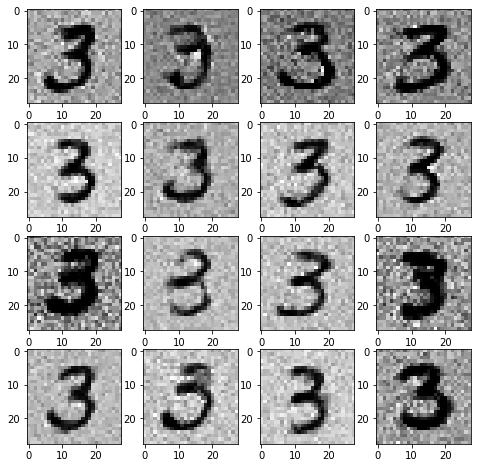


ITER:14000
D_cur_loss:0.17986419796943665
G_cur_loss:5.465147018432617



 30%|██▉       | 14998/50000 [08:05<15:47, 36.92it/s]  

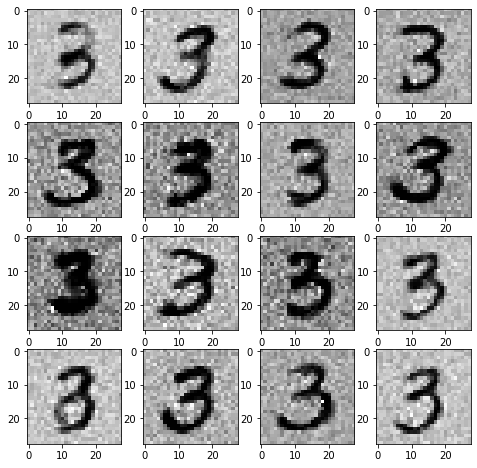


ITER:15000
D_cur_loss:0.157314732670784
G_cur_loss:4.590702056884766



 32%|███▏      | 16000/50000 [08:36<14:31, 39.03it/s]  

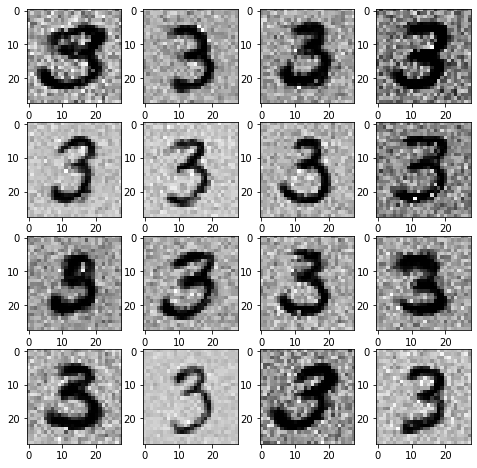


ITER:16000
D_cur_loss:0.11846809089183807
G_cur_loss:5.765295505523682



 34%|███▍      | 16999/50000 [09:04<16:12, 33.95it/s]  

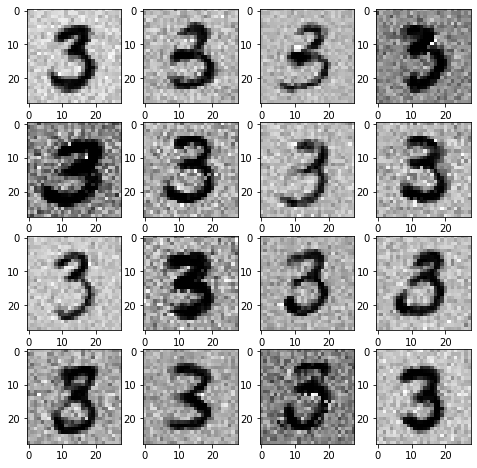


ITER:17000
D_cur_loss:0.1383223831653595
G_cur_loss:6.777682304382324



 36%|███▌      | 18000/50000 [09:33<16:02, 33.23it/s]  

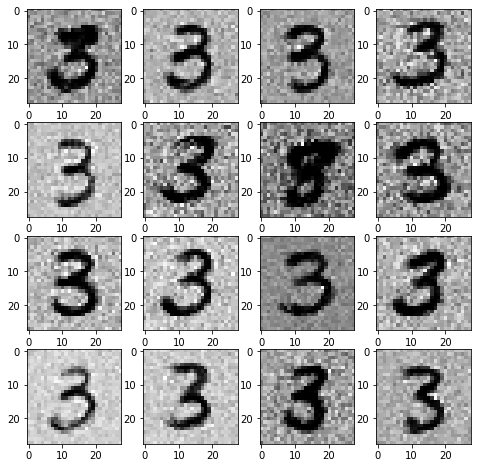


ITER:18000
D_cur_loss:0.06896370649337769
G_cur_loss:5.5569305419921875



 38%|███▊      | 18997/50000 [10:01<14:03, 36.75it/s]  

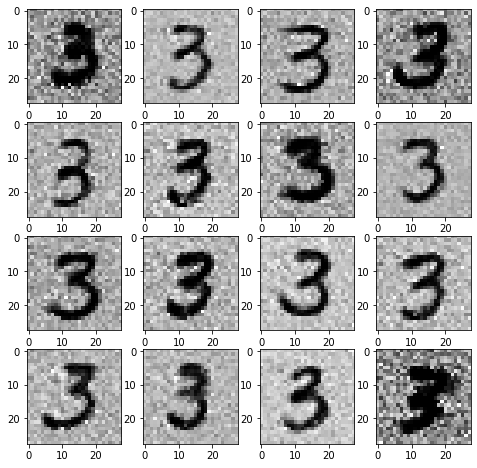


ITER:19000
D_cur_loss:0.06660861521959305
G_cur_loss:6.665918350219727



 40%|███▉      | 19997/50000 [10:32<11:58, 41.76it/s]  

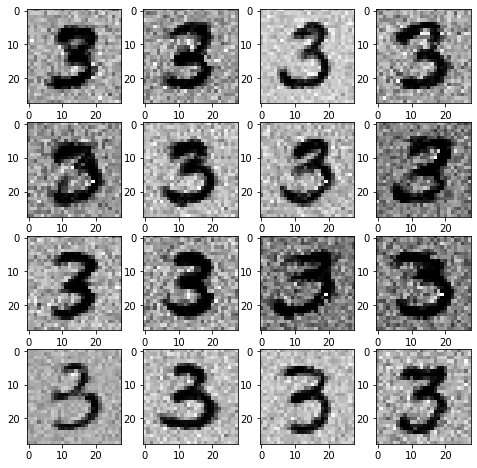


ITER:20000
D_cur_loss:0.04126713052392006
G_cur_loss:6.417337417602539



 42%|████▏     | 21000/50000 [10:58<12:04, 40.04it/s]  

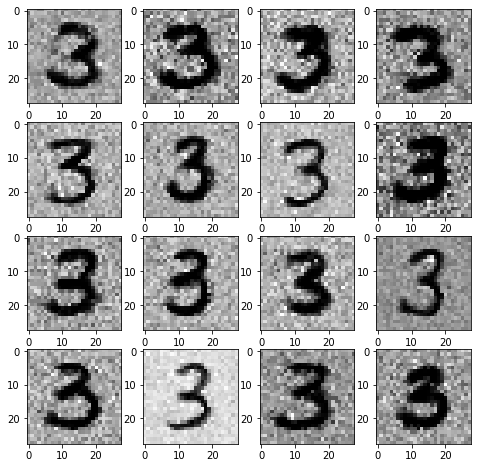


ITER:21000
D_cur_loss:0.06654836982488632
G_cur_loss:5.5326080322265625



 44%|████▍     | 21999/50000 [11:25<11:39, 40.02it/s]  

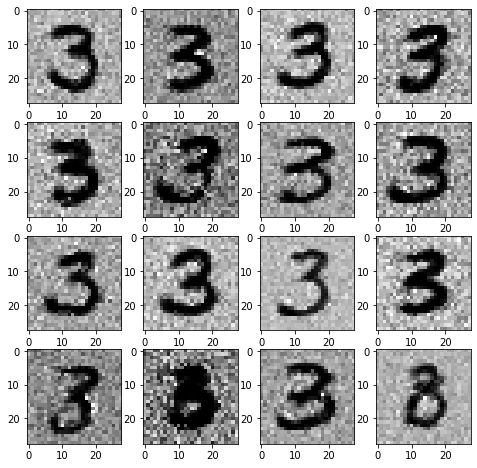


ITER:22000
D_cur_loss:0.05453021079301834
G_cur_loss:6.422739028930664



 46%|████▌     | 22998/50000 [11:52<11:08, 40.40it/s]

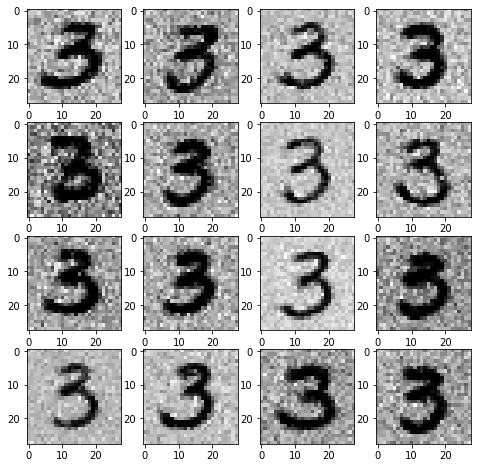


ITER:23000
D_cur_loss:0.04767061024904251
G_cur_loss:6.358701229095459



 48%|████▊     | 23998/50000 [12:19<10:20, 41.91it/s]

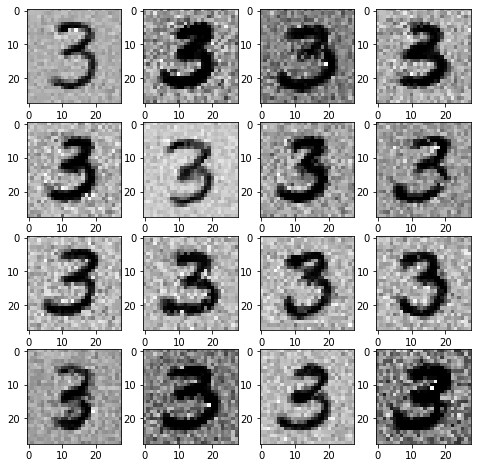


ITER:24000
D_cur_loss:0.12779657542705536
G_cur_loss:6.465216159820557



 50%|████▉     | 24998/50000 [12:51<12:28, 33.39it/s]

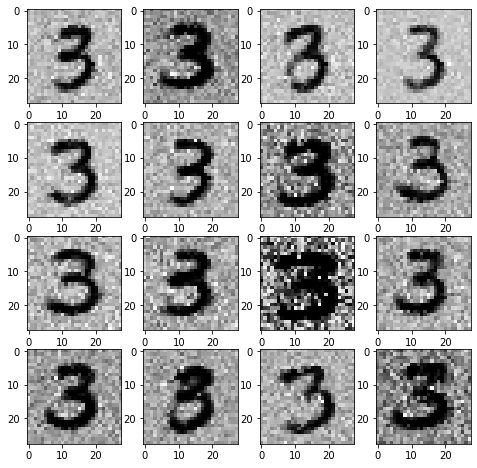


ITER:25000
D_cur_loss:0.022887393832206726
G_cur_loss:6.527312755584717



 52%|█████▏    | 25999/50000 [13:21<10:34, 37.85it/s]  

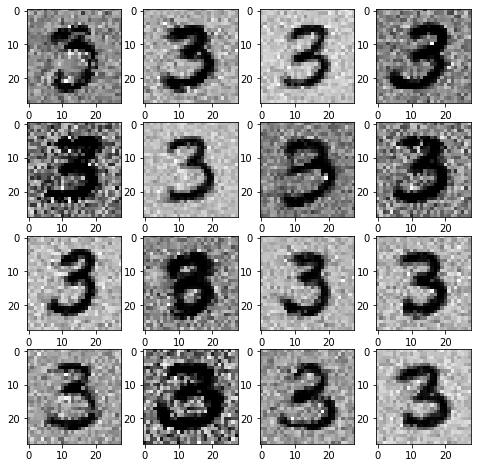


ITER:26000
D_cur_loss:0.015795445069670677
G_cur_loss:6.982475280761719



 54%|█████▍    | 26999/50000 [13:50<09:53, 38.77it/s]  

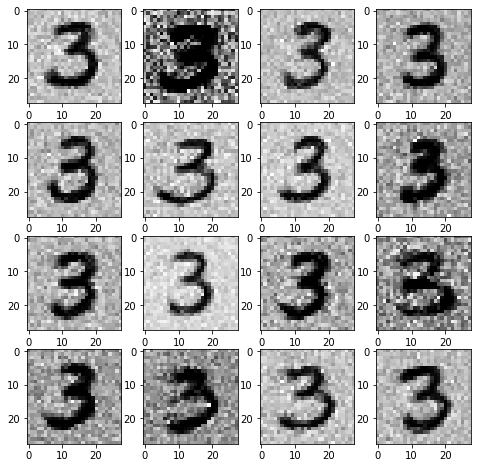


ITER:27000
D_cur_loss:0.05133461207151413
G_cur_loss:7.295773506164551



 56%|█████▌    | 28000/50000 [14:18<10:11, 35.98it/s]  

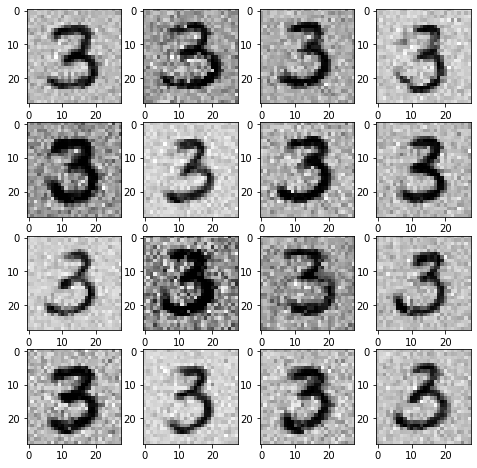


ITER:28000
D_cur_loss:0.026035238057374954
G_cur_loss:6.358214378356934



 58%|█████▊    | 29000/50000 [14:46<09:03, 38.66it/s]

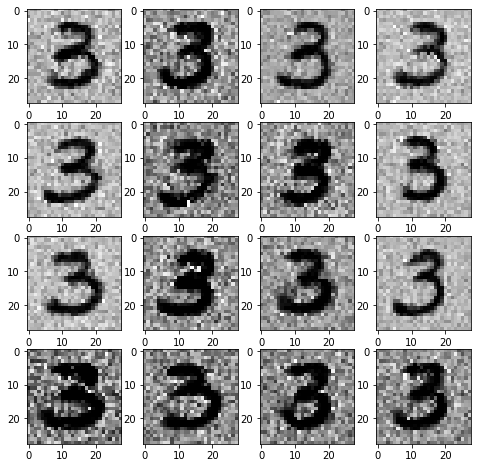


ITER:29000
D_cur_loss:0.03594150021672249
G_cur_loss:6.861959457397461



 60%|█████▉    | 29999/50000 [15:14<08:48, 37.86it/s]

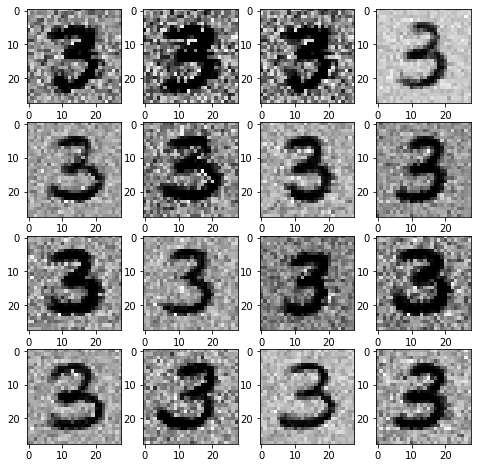


ITER:30000
D_cur_loss:0.008920621126890182
G_cur_loss:7.279481887817383



 62%|██████▏   | 31000/50000 [15:46<08:00, 39.50it/s]

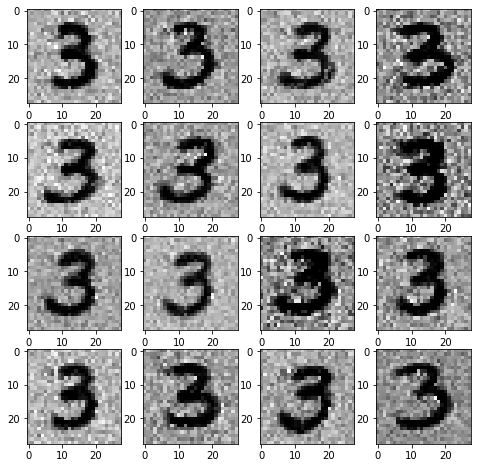


ITER:31000
D_cur_loss:0.029085297137498856
G_cur_loss:7.96785306930542



 64%|██████▍   | 31999/50000 [16:16<07:38, 39.29it/s]

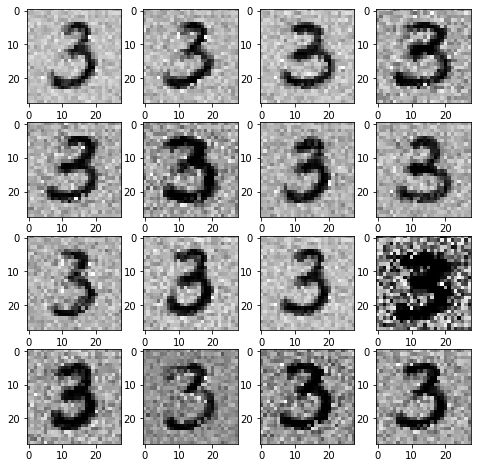


ITER:32000
D_cur_loss:0.016701309010386467
G_cur_loss:6.834416389465332



 66%|██████▌   | 32998/50000 [16:45<07:18, 38.75it/s]

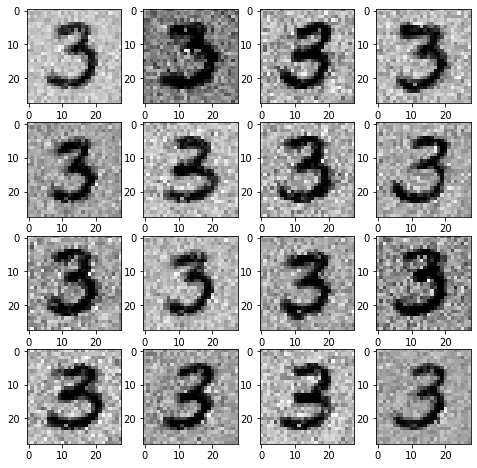


ITER:33000
D_cur_loss:0.004143798723816872
G_cur_loss:7.73441743850708



 68%|██████▊   | 34000/50000 [17:14<07:41, 34.67it/s]

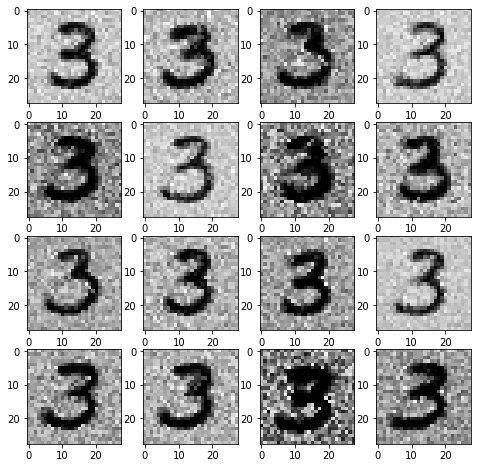


ITER:34000
D_cur_loss:0.005141310393810272
G_cur_loss:7.39284610748291



 70%|██████▉   | 34999/50000 [17:43<06:42, 37.25it/s]

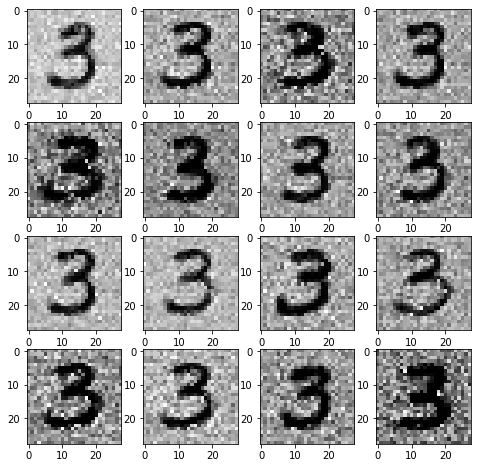


ITER:35000
D_cur_loss:0.07595770061016083
G_cur_loss:7.164913177490234



 72%|███████▏  | 35998/50000 [18:11<06:00, 38.85it/s]

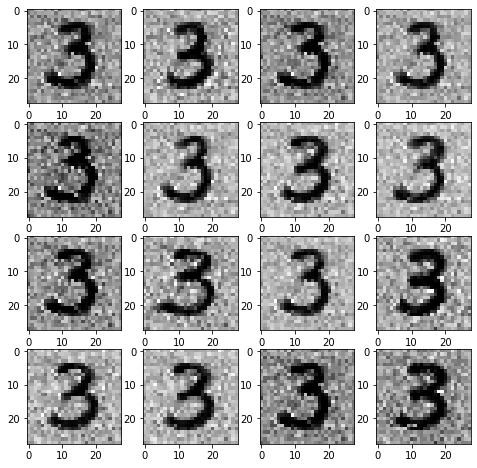


ITER:36000
D_cur_loss:0.001276791444979608
G_cur_loss:8.555488586425781



 74%|███████▍  | 36997/50000 [18:39<05:38, 38.39it/s]

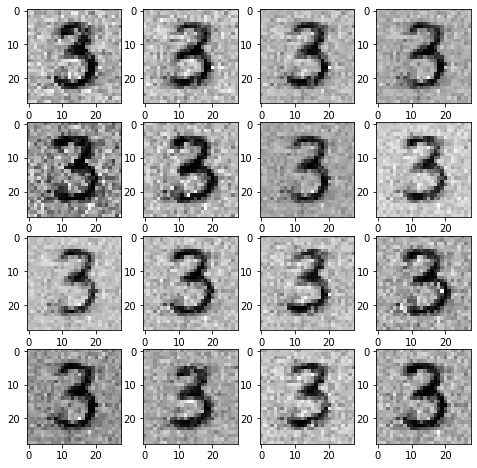


ITER:37000
D_cur_loss:0.003339627292007208
G_cur_loss:8.795171737670898



 76%|███████▌  | 37998/50000 [19:08<05:26, 36.76it/s]

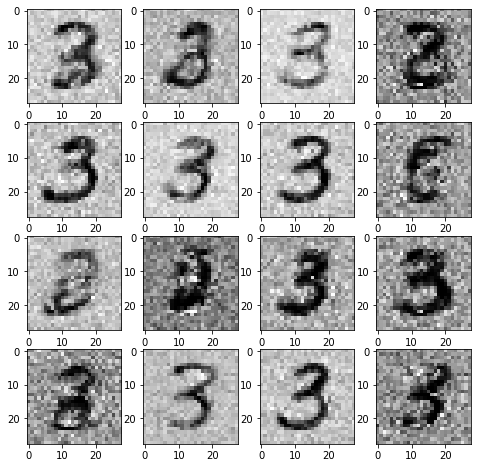


ITER:38000
D_cur_loss:0.043070051819086075
G_cur_loss:7.035076141357422



 78%|███████▊  | 38999/50000 [19:36<04:44, 38.62it/s]

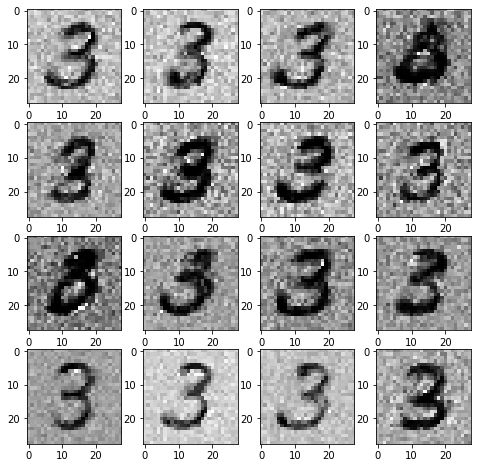


ITER:39000
D_cur_loss:0.08948379009962082
G_cur_loss:7.746454238891602



 80%|███████▉  | 39999/50000 [20:04<04:15, 39.13it/s]

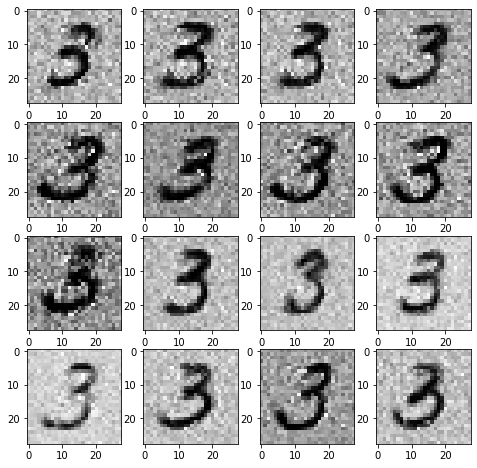


ITER:40000
D_cur_loss:0.06188467890024185
G_cur_loss:6.517024040222168



 82%|████████▏ | 41000/50000 [20:34<03:53, 38.57it/s]

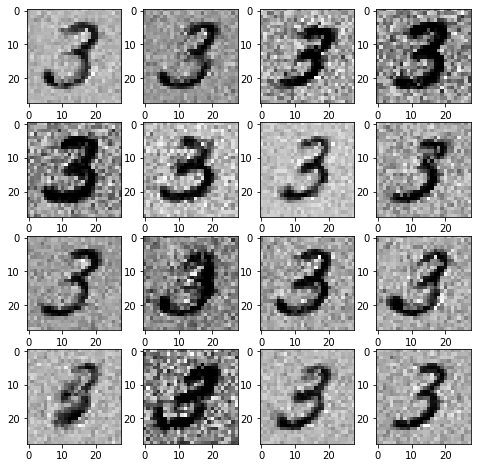


ITER:41000
D_cur_loss:0.02417336404323578
G_cur_loss:7.141453742980957



 84%|████████▍ | 41998/50000 [21:04<03:12, 41.64it/s]

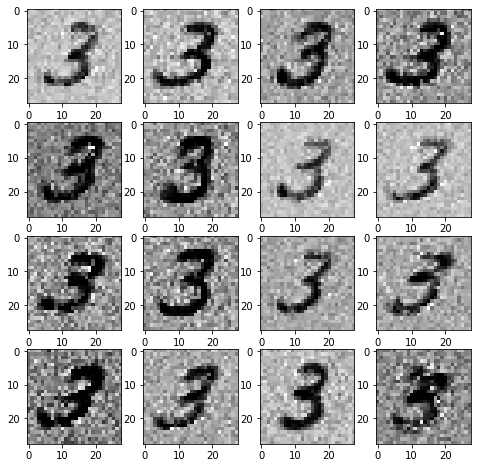


ITER:42000
D_cur_loss:0.07976779341697693
G_cur_loss:6.843829154968262



 86%|████████▌ | 42997/50000 [21:31<03:12, 36.32it/s]

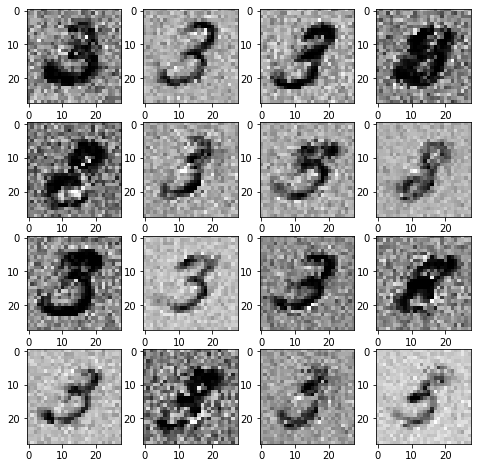


ITER:43000
D_cur_loss:0.009986421093344688
G_cur_loss:7.401904582977295



 88%|████████▊ | 43996/50000 [21:57<02:24, 41.44it/s]

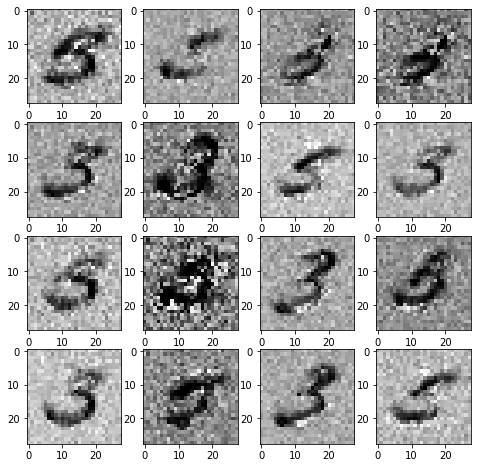


ITER:44000
D_cur_loss:0.04249921813607216
G_cur_loss:7.706814765930176



 90%|████████▉ | 44998/50000 [22:23<02:02, 40.95it/s]

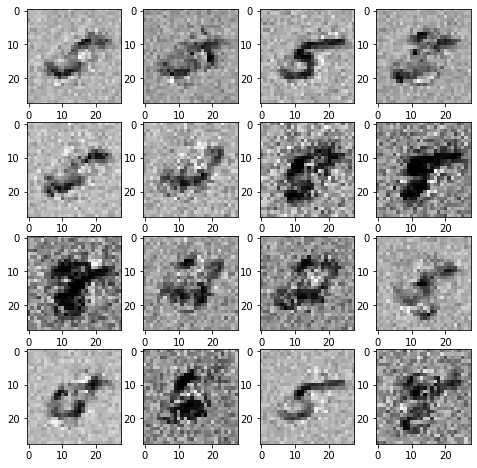


ITER:45000
D_cur_loss:0.02451845072209835
G_cur_loss:7.7275071144104



 92%|█████████▏| 46000/50000 [22:54<01:48, 36.71it/s]

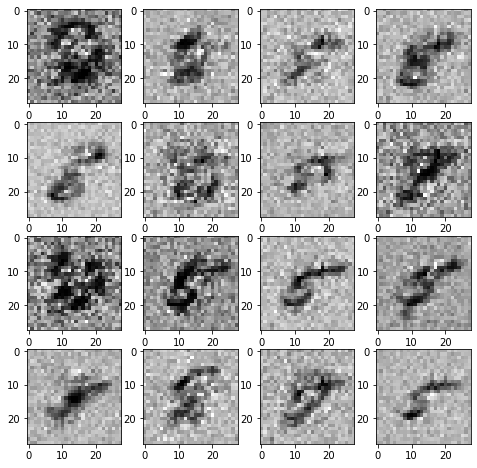


ITER:46000
D_cur_loss:0.1310499906539917
G_cur_loss:8.169745445251465



 94%|█████████▍| 46999/50000 [23:28<01:43, 29.13it/s]

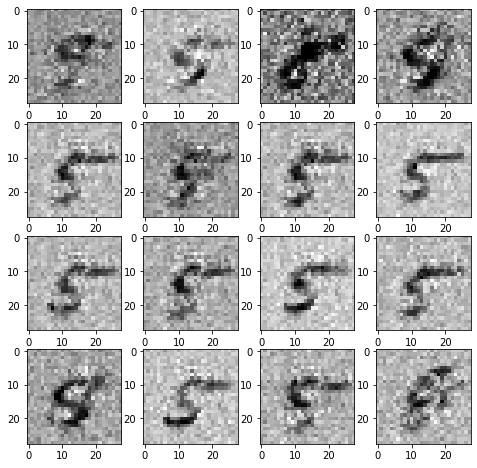


ITER:47000
D_cur_loss:0.12020200490951538
G_cur_loss:7.305719375610352



 96%|█████████▌| 47999/50000 [24:01<00:51, 39.10it/s]

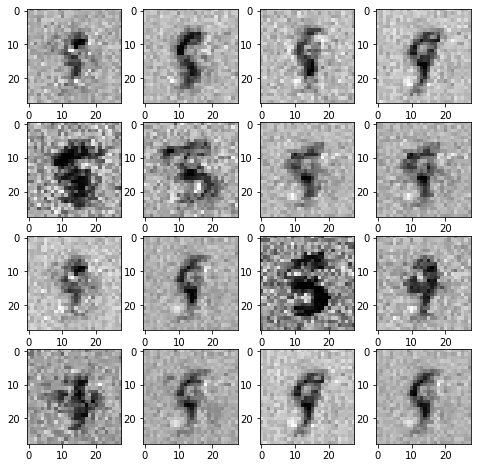


ITER:48000
D_cur_loss:0.032375872135162354
G_cur_loss:7.9735517501831055



 98%|█████████▊| 48999/50000 [24:31<00:28, 35.24it/s]

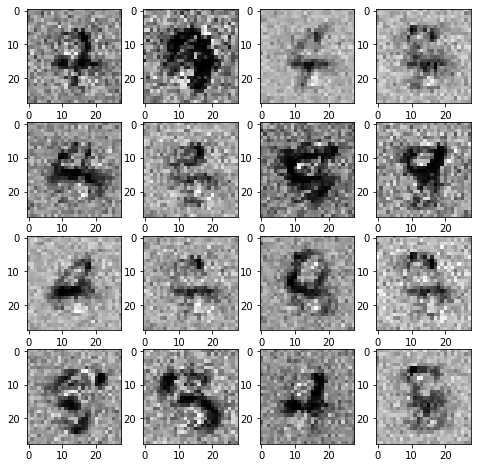


ITER:49000
D_cur_loss:0.025322148576378822
G_cur_loss:7.401162624359131



100%|██████████| 50000/50000 [25:05<00:00, 33.22it/s]


In [10]:
for i in tqdm(range(50000)):
    if i % 1000 == 0:
        example_1 = sess.run(generator(z),feed_dict = {z: np.random.uniform(-1,1,size = [128,100])} )
        #fig = show_images(example_1[:24])
        fig=plt.figure(figsize=(8, 8))
        for j in range(1,17):
            fig.add_subplot(4, 4, j)
            plt.imshow(example_1[j].reshape(28,28), cmap='gray_r')
        plt.show()
        print()
    X,_ = mnist.train.next_batch(128)
    _,d_cur_loss = sess.run([D_solver,d_loss],feed_dict = {x:X,z: np.random.uniform(-1,1,size = [128,100])})
    _,g_cur_loss = sess.run([G_solver,g_loss],feed_dict = {z: np.random.uniform(-1,1,size = [128,100])})

    if i % 1000 == 0:
        print('ITER:{}'.format(i))
        print('D_cur_loss:{}'.format(d_cur_loss))
        print('G_cur_loss:{}'.format(g_cur_loss))
        print()